In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def recurrent_formula(x, dx, v_cur, v_prev, p):
        t1 = (x * x / (dx * dx) + x / (2*dx))
        t2 = (-2 * v_cur + v_prev) / (dx * dx)
        t3 = x * v_prev / (2 * dx)
        t4 = (x * x - p * p) * v_cur
        return ((-1) * x * x * t2 + t3 - t4) / t1

In [29]:
# DEBUG CELL
# _x = np.linspace(0, 10, 100)
# v_arr = [0, 0.1]
# for i in range(2, len(_x)):
#     v_arr.append(recurrent_formula(_x[i - 1], 0.1, v_arr[i - 1], v_arr[i - 2], 0.5))
#     print(v_arr[-1])
#     if input():
#         break

0.1495
0.18550124999999998
0.21404743264484974
0.23731867088964514
0.2563543025939705
0.2717320952358265
0.2838098655191871
0.29283063547474225


In [35]:
def calc_bessel_equation(domain, h, start_conditions, p_values, rec_form=recurrent_formula):
    """
    domain: [a, b]
    start_conditions: v(a)=v_a, v`(a)=dv_a
    p_values: list[len: 4]
    """
    
    A, B = domain
    N = round((B - A) / h)
    x_axis = np.linspace(A, B, N)
    v2p_axies = []
    for i in range(len(p_values)):
        v2p_axies.append([start_conditions[0], start_conditions[0] + start_conditions[1] * h])
    for i in range(2, N):
        for j in range(len(p_values)): 
            v2p_axies[j].append(
                rec_form(x_axis[i - 1], h, v2p_axies[j][i - 1], v2p_axies[j][i - 2], p_values[j])
            )
    # print(x_axis)
    return (x_axis, v2p_axies)

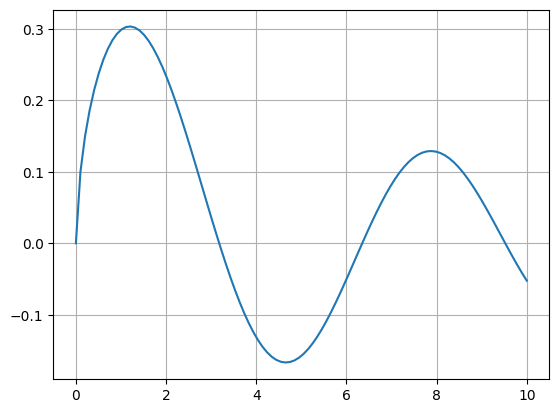

In [36]:
res = calc_bessel_equation((0, 10), 0.1, [0, 1], [0.5])
x, v = res[0], res[1][0]
# print(len(x))
plt.plot(x, v)
plt.grid()
plt.show()
# print(v)

In [37]:
def recurrent_formula_singular(x, dx, v_cur, v_prev, y):
    t1 = (x / (dx * dx) + y / (2 * dx))
    t2 = x * (2 * v_cur - v_prev) / (dx * dx)
    t3 = y * v_prev / (2 * dx)
    return (t2 + t3 - x * v_cur) / t1


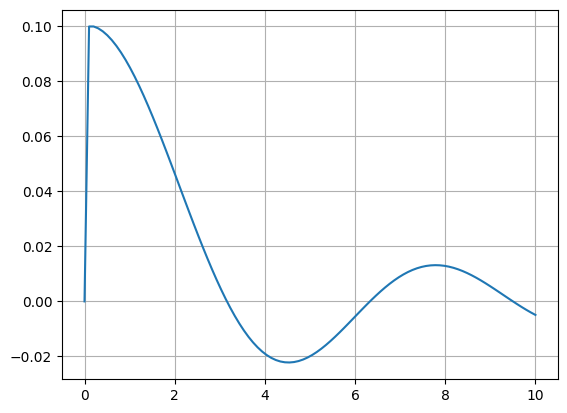

In [39]:
res = calc_bessel_equation((0, 10), 0.1, [0, 1], [0.5 * 2 + 1], rec_form=recurrent_formula_singular)
x, v = res[0], res[1][0]
# print(len(x))
plt.plot(x, v)
plt.grid()
plt.show()
# print(v)